In [1]:
import os
import sys
import random
import pickle

sys.path.append('..')
sys.path.append('../src')
sys.path.append('../results')

import git
import numpy as np
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
dataset = 'email-eucore'
experiment = 'sequential_random'

In [4]:
rootpath = git.Repo(os.getcwd(), search_parent_directories=True).git.rev_parse("--show-toplevel")
resultspath = f'results/experiment_{experiment}'
filepath = lambda x, y: f'{dataset}_{x}.{y}'

In [5]:
model = 'base'
result = 'mdls'
base_mdls = {}
with open(os.path.join(rootpath, resultspath, filepath(model, result)), 'r') as infile:
    infile.readline()
    for line in infile:
        trial, time, p, mdl = line.strip().split(',')
        trial, time, p, mdl = (int(trial), int(time), float(p), float(mdl))
        
        base_mdls[(trial, time, p)] = mdl
model = 'joint'
result = 'mdls'
joint_mdls = {}
with open(os.path.join(rootpath, resultspath, filepath(model, result)), 'r') as infile:
    infile.readline()
    for line in infile:
        trial, t1, t2, p, mdl = line.strip().split(',')
        trial, t1, t2, p, mdl = (int(trial), int(t1), int(t2), float(p), float(mdl))
        
        joint_mdls[(trial, t1, t2, p)] = mdl
model = 'indep'
result = 'mdls'
indep_mdls = {}
with open(os.path.join(rootpath, resultspath, filepath(model, result)), 'r') as infile:
    infile.readline()
    for line in infile:
        trial, t1, t2, p, mdl = line.strip().split(',')
        trial, t1, t2, p, mdl = (int(trial), int(t1), int(t2), float(p), float(mdl))
        
        indep_mdls[(trial, t1, t2, p)] = mdl

In [6]:
model = 'joint'
result = 'lls'
joint_lls = {}
with open(os.path.join(rootpath, resultspath, filepath(model, result)), 'r') as infile:
    infile.readline()
    for line in infile:
        trial, t1, t2, p, ll = line.strip().split(',')
        trial, t1, t2, p, ll = (int(trial), int(t1), int(t2), float(p), float(ll))
        
        joint_lls[(trial, t1, t2, p)] = ll
model = 'indep'
result = 'lls'
indep_lls = {}
with open(os.path.join(rootpath, resultspath, filepath(model, result)), 'r') as infile:
    infile.readline()
    for line in infile:
        trial, t1, t2, p, ll = line.strip().split(',')
        trial, t1, t2, p, ll = (int(trial), int(t1), int(t2), float(p), float(ll))
        
        indep_lls[(trial, t1, t2, p)] = ll

In [7]:
trials = sorted(list({t for t, t1, t2, p in indep_lls}))
time_pairs = sorted(list({(t1, t2) for t, t1, t2, p in indep_lls}), key=lambda x: x[0])
ps = sorted(list({p for t, t1, t2, p in indep_lls}))
times = sorted(list({t for t, _ in time_pairs}))

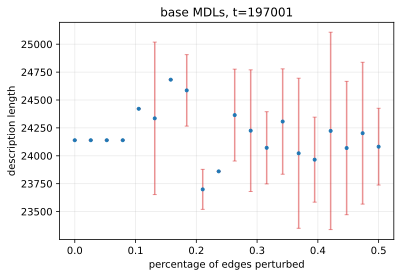

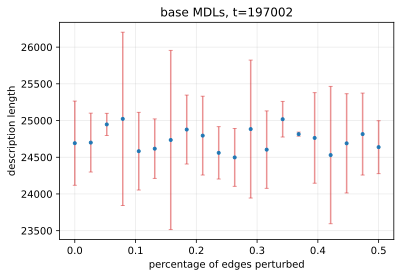

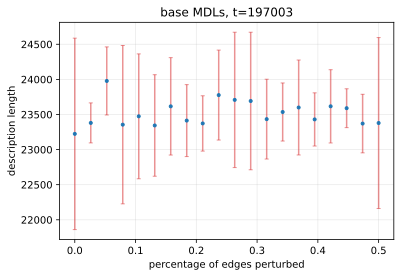

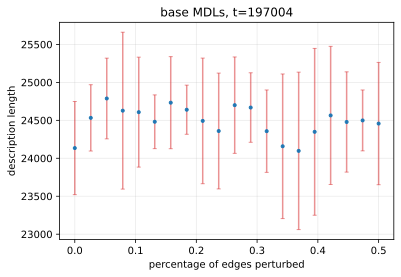

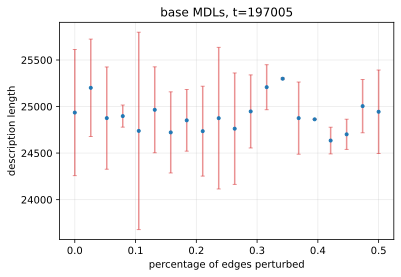

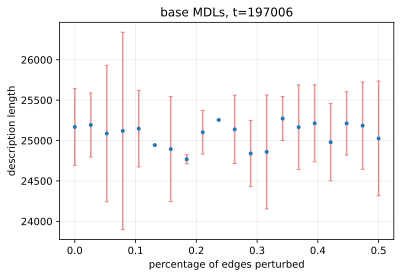

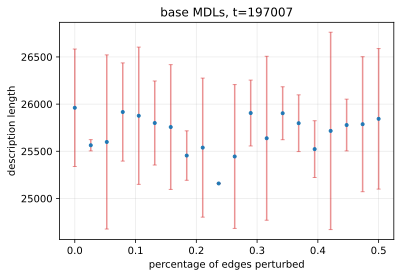

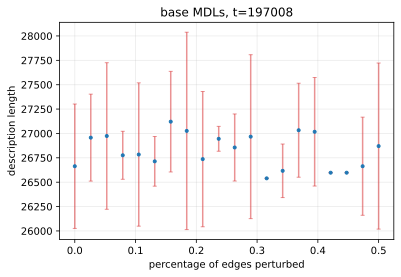

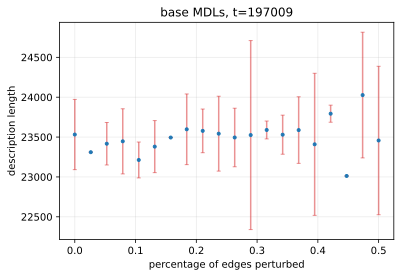

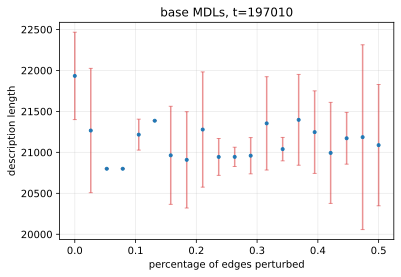

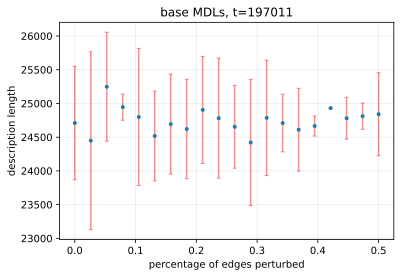

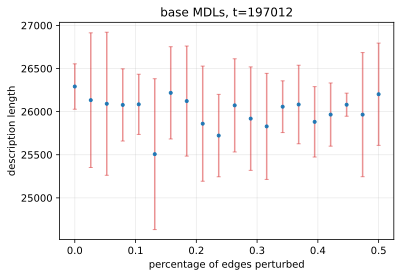

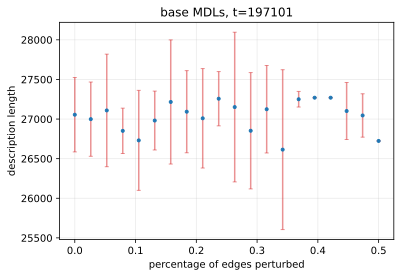

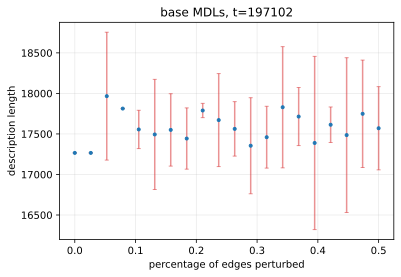

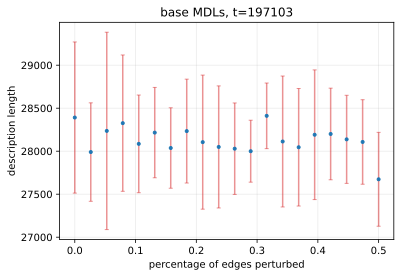

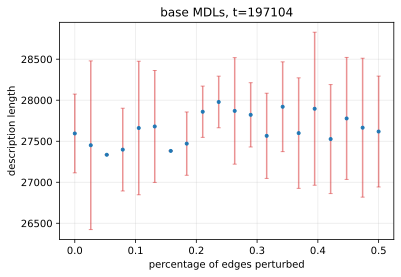

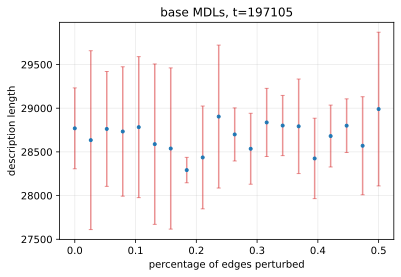

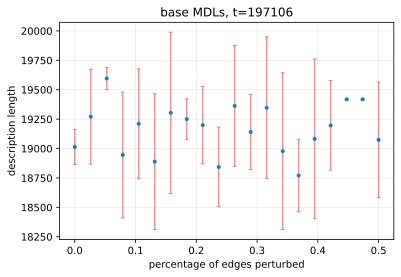

In [8]:
for idx, time in enumerate(times):
    ax = plt.axes()
    ax.set_title(f'base MDLs, t={time}')
    ax.set_xlabel('percentage of edges perturbed')
    ax.set_ylabel('description length')
    ax.grid(alpha=0.25)

    bmdl = [[mdl for (tr, ti, pr), mdl in base_mdls.items()
             if ti == time and pr == p]
            for p in ps]
    
    ymins = np.asarray([np.min(mdl) for mdl in bmdl])
    ymaxs = np.asarray([np.max(mdl) for mdl in bmdl])
    yavgs = np.asarray([np.mean(mdl) for mdl in bmdl])
    yerrs = ymaxs - ymins

    # ax.scatter(ps, ymaxs, marker='_', color='black', alpha=0.25)
    # ax.scatter(ps, ymins, marker='_', color='black', alpha=0.25)
    # ax.scatter(ps, yavgs, color='royalblue')
    markers, caps, bars = ax.errorbar(ps, yavgs, yerr=yerrs,
                                       fmt='.', ecolor='tab:red', capsize=2)
    [bar.set_alpha(0.5) for bar in bars]
    [cap.set_alpha(0.5) for cap in caps]
    
    # plt.savefig("base_random_mdl.pdf", format = 'pdf', dpi=300)
    plt.plot()
    plt.show()

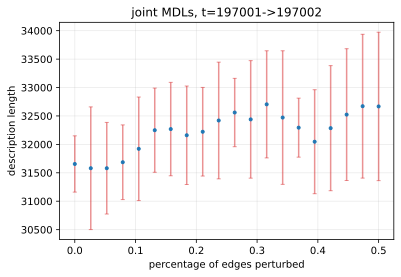

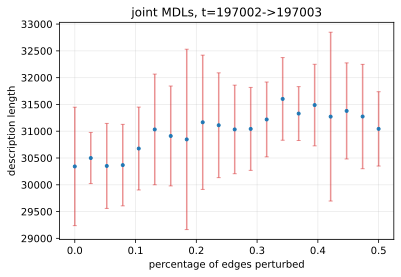

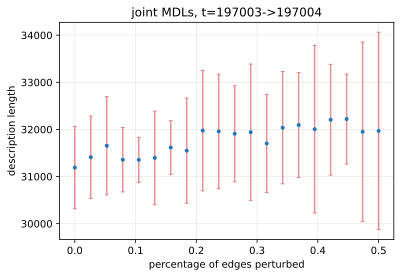

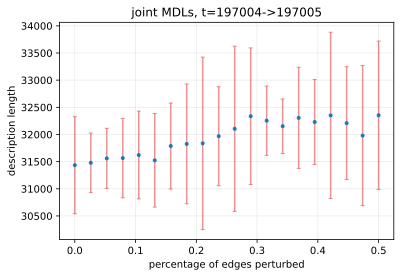

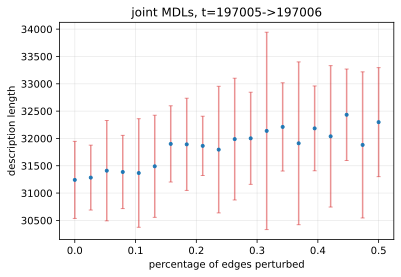

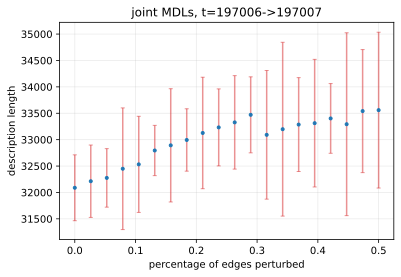

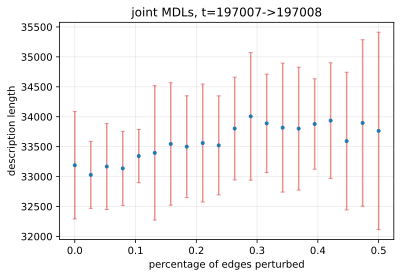

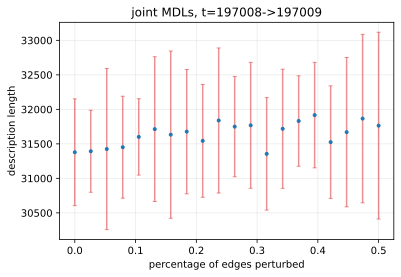

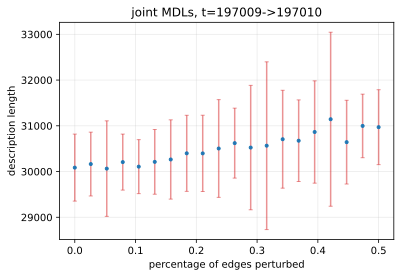

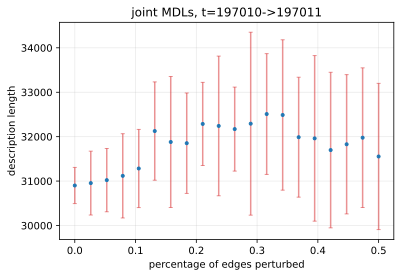

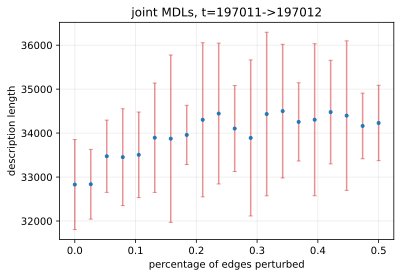

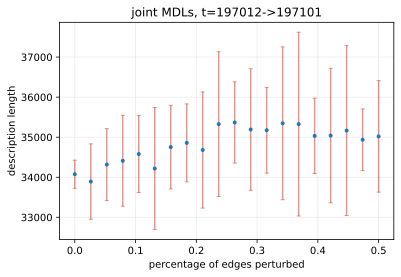

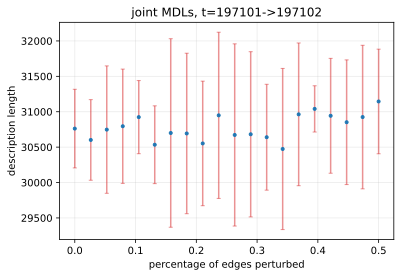

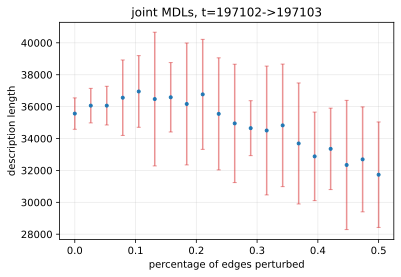

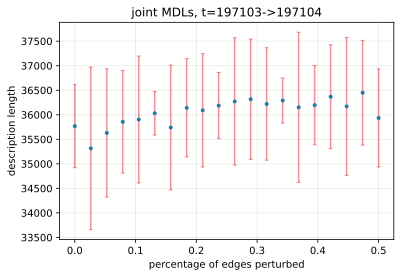

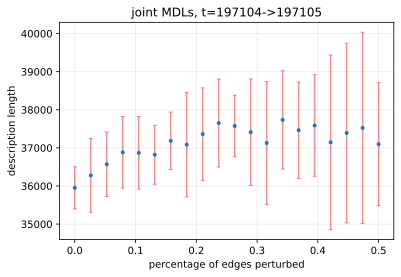

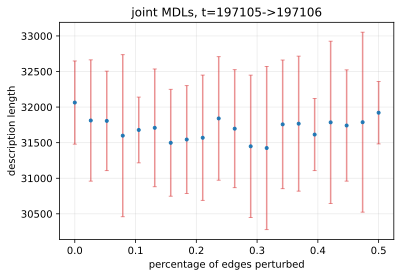

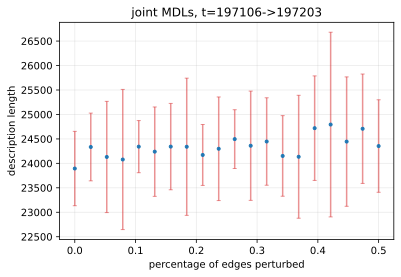

In [9]:
for idx, time in enumerate(times):
    time1 = time
    time2, = [ttt for tt, ttt in time_pairs if tt == time]
    ax = plt.axes()
    ax.set_title(f'joint MDLs, t={time1}->{time2}')
    ax.set_xlabel('percentage of edges perturbed')
    ax.set_ylabel('description length')
    ax.grid(alpha=0.25)

    jmdl = [[mdl for (tr, t1, t2, pr), mdl in joint_mdls.items()
             if t1 == time1 and t2 == time2 and pr == p]
            for p in ps]
    
    ymins = np.asarray([np.min(mdl) for mdl in jmdl])
    ymaxs = np.asarray([np.max(mdl) for mdl in jmdl])
    yavgs = np.asarray([np.mean(mdl) for mdl in jmdl])
    yerrs = ymaxs - ymins

    # ax.scatter(ps, ymaxs, marker='_', color='black', alpha=0.25)
    # ax.scatter(ps, ymins, marker='_', color='black', alpha=0.25)
    # ax.scatter(ps, yavgs, color='royalblue')
    markers, caps, bars = ax.errorbar(ps, yavgs, yerr=yerrs,
                                       fmt='.', ecolor='tab:red', capsize=2)
    [bar.set_alpha(0.5) for bar in bars]
    [cap.set_alpha(0.5) for cap in caps]
    
    # plt.savefig("base_random_mdl.pdf", format = 'pdf', dpi=300)
    plt.plot()
    plt.show()

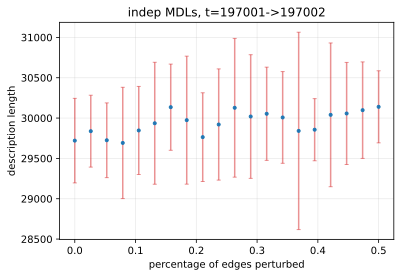

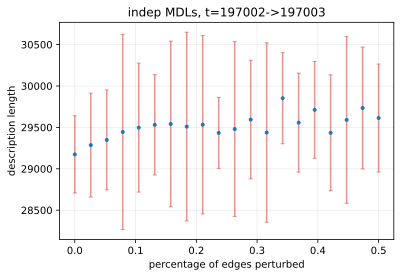

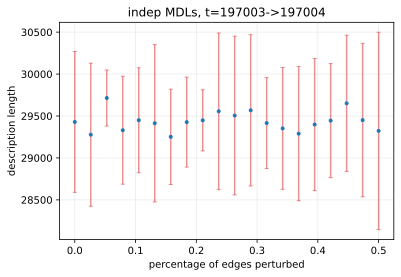

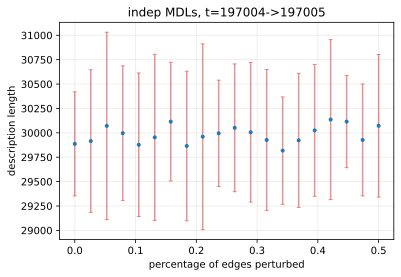

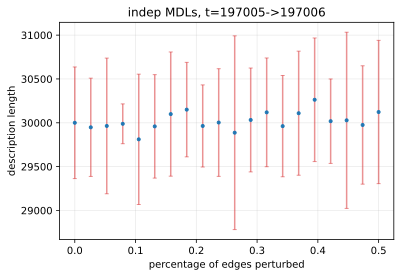

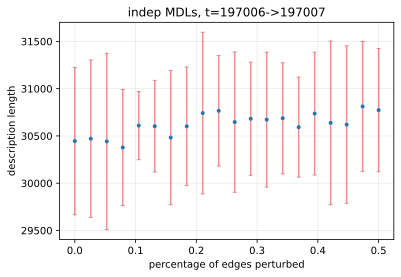

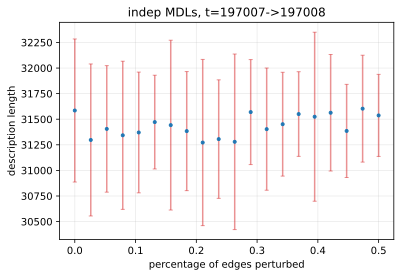

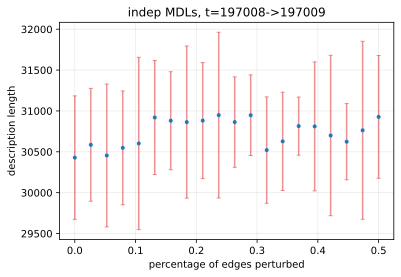

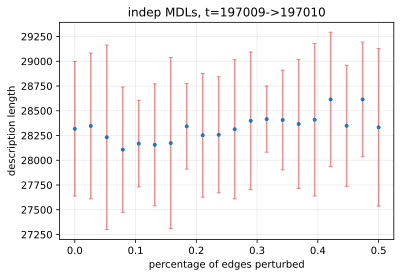

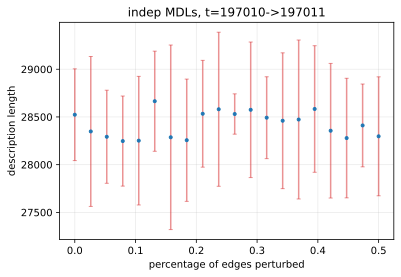

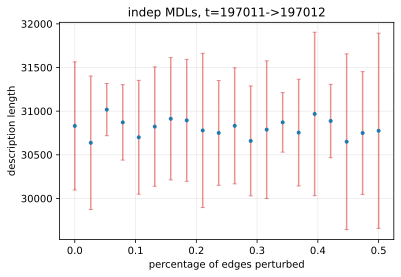

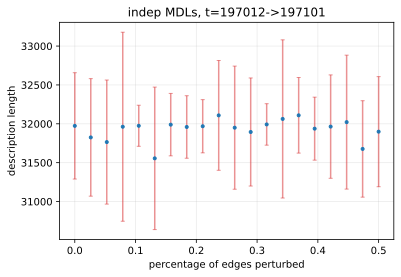

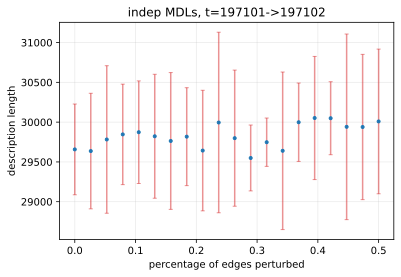

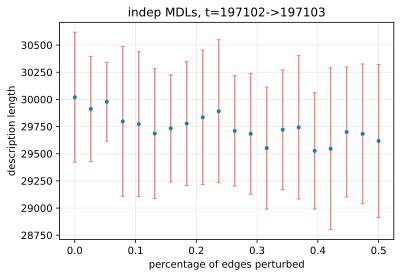

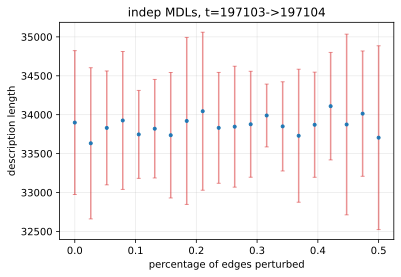

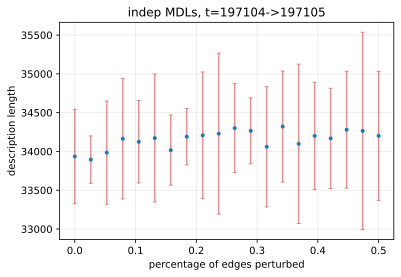

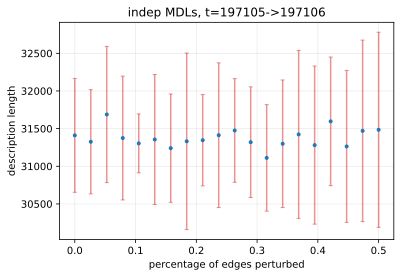

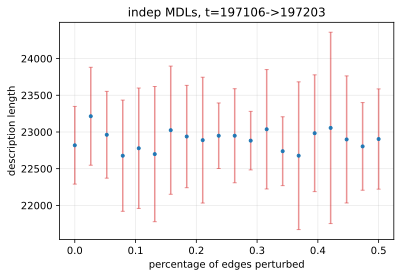

In [10]:
for idx, time in enumerate(times):
    time1 = time
    time2, = [ttt for tt, ttt in time_pairs if tt == time]
    ax = plt.axes()
    ax.set_title(f'indep MDLs, t={time1}->{time2}')
    ax.set_xlabel('percentage of edges perturbed')
    ax.set_ylabel('description length')
    ax.grid(alpha=0.25)

    imdl = [[mdl for (tr, t1, t2, pr), mdl in indep_mdls.items()
             if t1 == time1 and t2 == time2 and pr == p]
            for p in ps]
    
    ymins = np.asarray([np.min(mdl) for mdl in imdl])
    ymaxs = np.asarray([np.max(mdl) for mdl in imdl])
    yavgs = np.asarray([np.mean(mdl) for mdl in imdl])
    yerrs = ymaxs - ymins

    # ax.scatter(ps, ymaxs, marker='_', color='black', alpha=0.25)
    # ax.scatter(ps, ymins, marker='_', color='black', alpha=0.25)
    # ax.scatter(ps, yavgs, color='royalblue')
    markers, caps, bars = ax.errorbar(ps, yavgs, yerr=yerrs,
                                       fmt='.', ecolor='tab:red', capsize=2)
    [bar.set_alpha(0.5) for bar in bars]
    [cap.set_alpha(0.5) for cap in caps]
    
    # plt.savefig("base_random_mdl.pdf", format = 'pdf', dpi=300)
    plt.plot()
    plt.show()

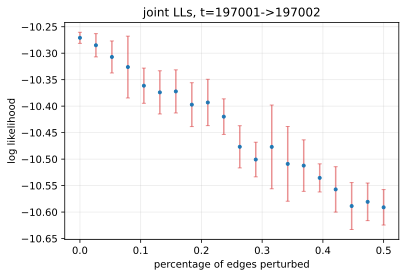

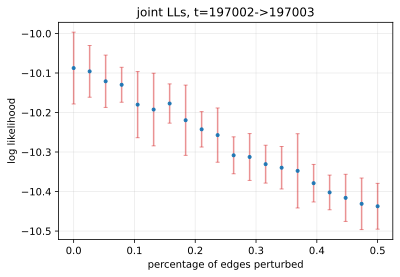

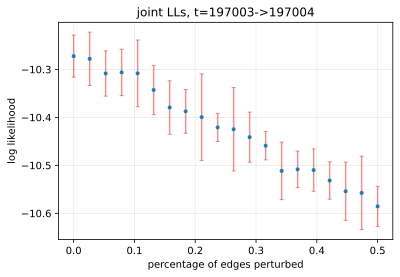

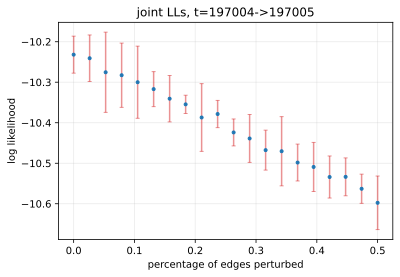

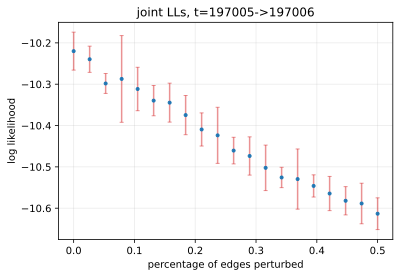

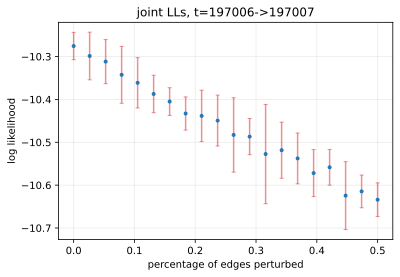

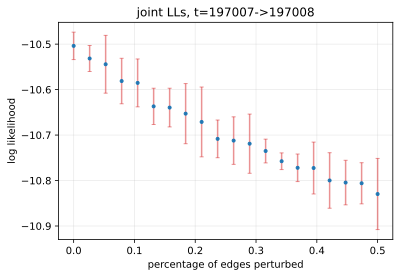

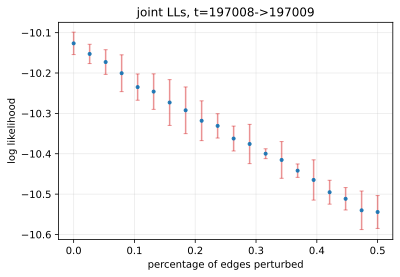

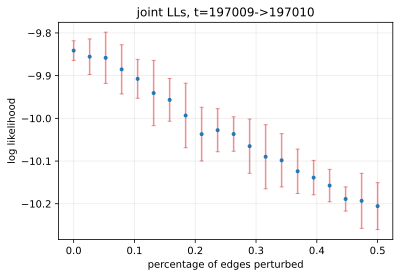

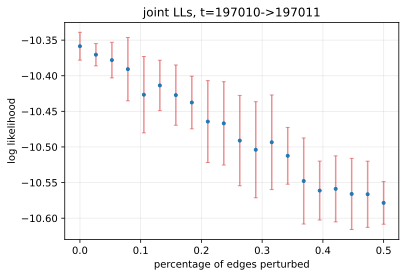

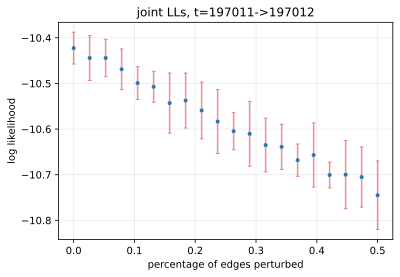

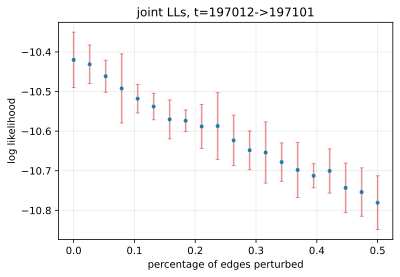

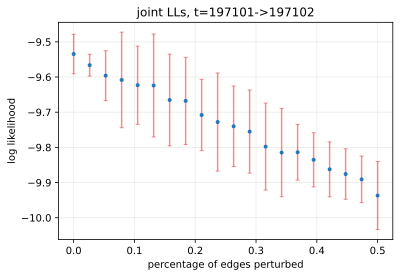

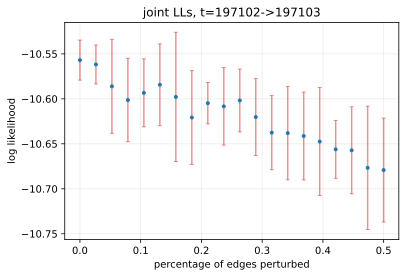

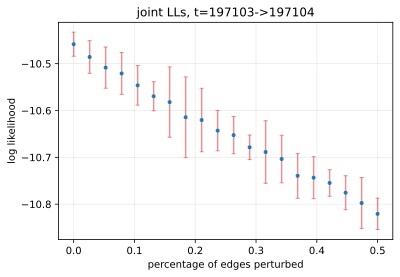

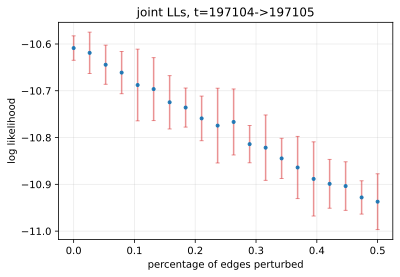

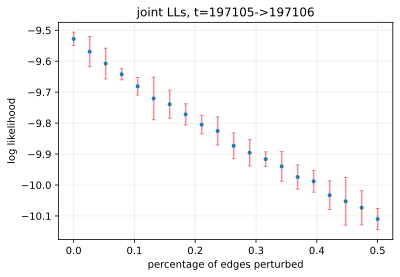

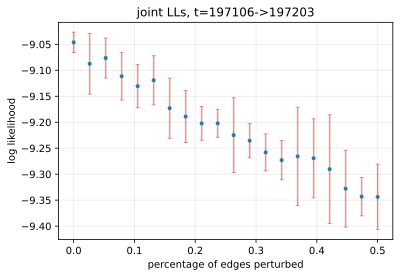

In [11]:
for idx, time in enumerate(times):
    time1 = time
    time2, = [ttt for tt, ttt in time_pairs if tt == time]
    ax = plt.axes()
    ax.set_title(f'joint LLs, t={time1}->{time2}')
    ax.set_xlabel('percentage of edges perturbed')
    ax.set_ylabel('log likelihood')
    ax.grid(alpha=0.25)

    jll = [[ll for (tr, t1, t2, pr), ll in joint_lls.items()
             if t1 == time1 and t2 == time2 and pr == p]
            for p in ps]
    
    ymins = np.asarray([np.min(ll) for ll in jll])
    ymaxs = np.asarray([np.max(ll) for ll in jll])
    yavgs = np.asarray([np.mean(ll) for ll in jll])
    yerrs = ymaxs - ymins

    # ax.scatter(ps, ymaxs, marker='_', color='black', alpha=0.25)
    # ax.scatter(ps, ymins, marker='_', color='black', alpha=0.25)
    # ax.scatter(ps, yavgs, color='royalblue')
    markers, caps, bars = ax.errorbar(ps, yavgs, yerr=yerrs,
                                       fmt='.', ecolor='tab:red', capsize=2)
    [bar.set_alpha(0.5) for bar in bars]
    [cap.set_alpha(0.5) for cap in caps]
    
    # plt.savefig("base_random_ll.pdf", format = 'pdf', dpi=300)
    plt.plot()
    plt.show()

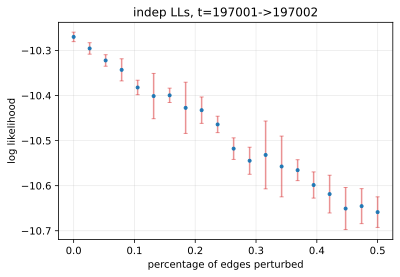

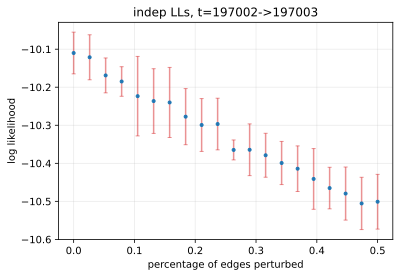

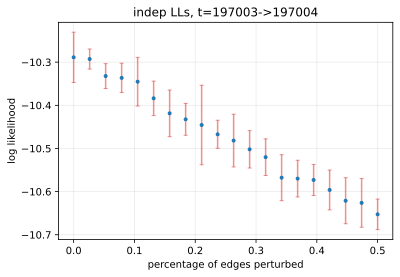

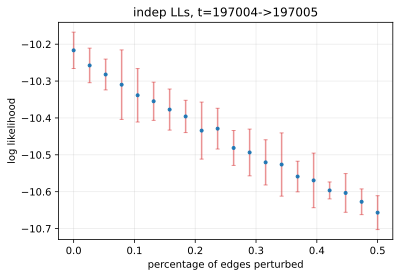

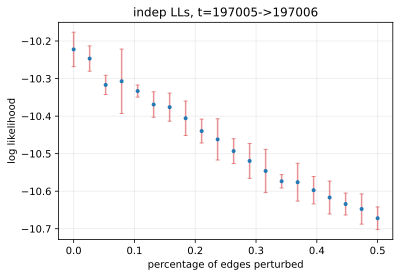

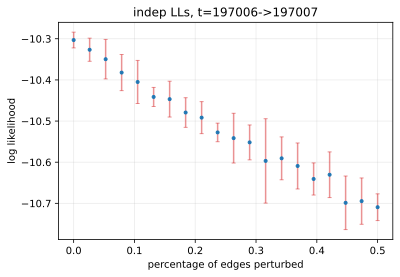

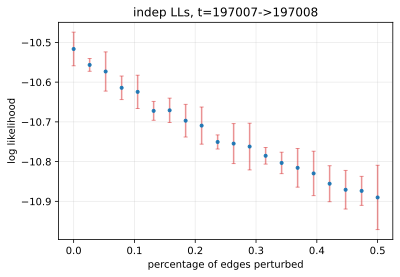

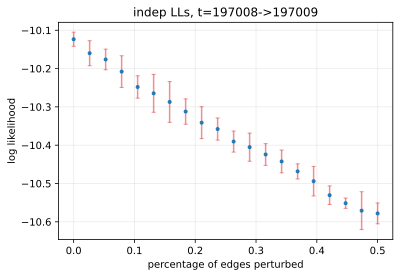

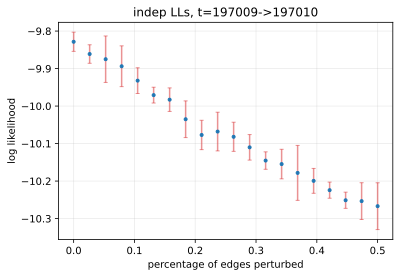

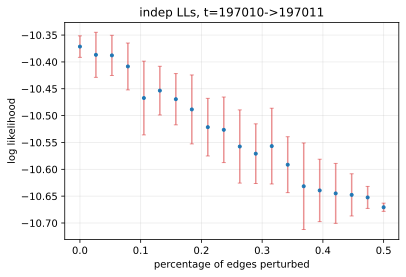

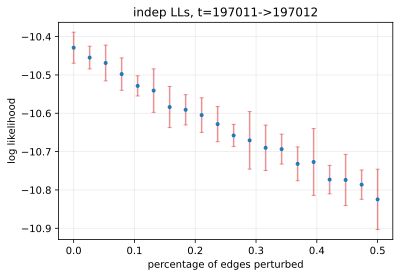

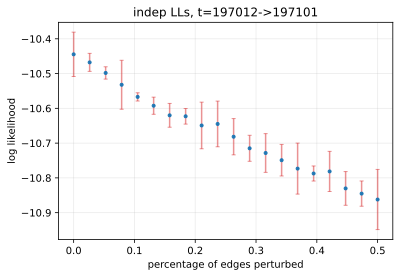

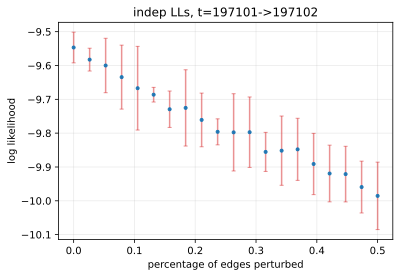

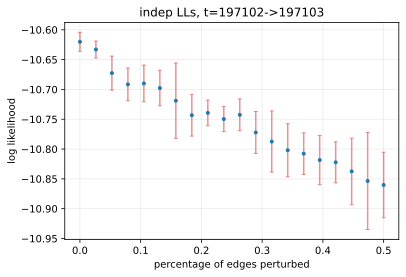

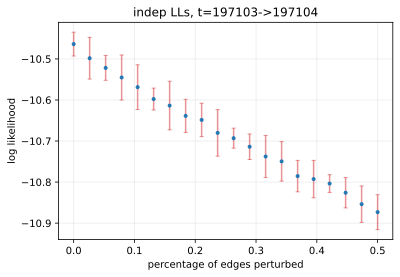

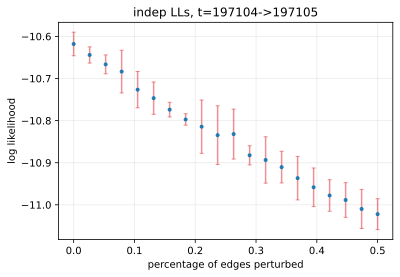

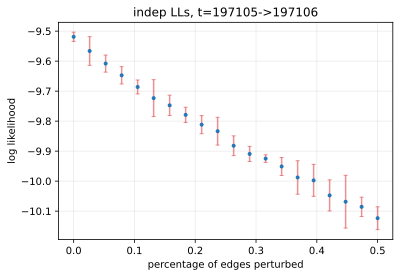

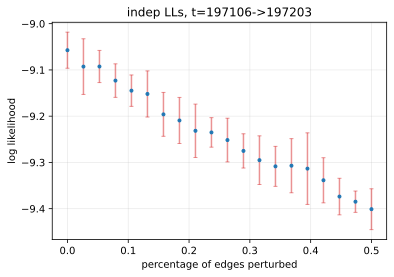

In [12]:
for idx, time in enumerate(times):
    time1 = time
    time2, = [ttt for tt, ttt in time_pairs if tt == time]
    ax = plt.axes()
    ax.set_title(f'indep LLs, t={time1}->{time2}')
    ax.set_xlabel('percentage of edges perturbed')
    ax.set_ylabel('log likelihood')
    ax.grid(alpha=0.25)

    jll = [[ll for (tr, t1, t2, pr), ll in indep_lls.items()
             if t1 == time1 and t2 == time2 and pr == p]
            for p in ps]
    
    ymins = np.asarray([np.min(ll) for ll in jll])
    ymaxs = np.asarray([np.max(ll) for ll in jll])
    yavgs = np.asarray([np.mean(ll) for ll in jll])
    yerrs = ymaxs - ymins

    # ax.scatter(ps, ymaxs, marker='_', color='black', alpha=0.25)
    # ax.scatter(ps, ymins, marker='_', color='black', alpha=0.25)
    # ax.scatter(ps, yavgs, color='royalblue')
    markers, caps, bars = ax.errorbar(ps, yavgs, yerr=yerrs,
                                       fmt='.', ecolor='tab:red', capsize=2)
    [bar.set_alpha(0.5) for bar in bars]
    [cap.set_alpha(0.5) for cap in caps]
    
    # plt.savefig("base_random_ll.pdf", format = 'pdf', dpi=300)
    plt.plot()
    plt.show()